female confussion matrix:  [[246, 254], [246, 254]] male confussion matrix:  [[254, 246], [254, 246]] female accurary and recall:  (0.492, 0.5) male accuracy and recall:  (0.508, 0.5)


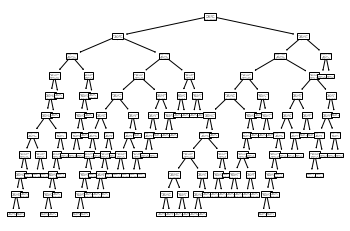

female confussion matrix:  [[246, 254], [246, 254]] male confussion matrix:  [[254, 246], [254, 246]] female accurary and recall:  (0.492, 0.5) male accuracy and recall:  (0.508, 0.5)
female confussion matrix:  [[246, 254], [246, 254]] male confussion matrix:  [[254, 246], [254, 246]] female accurary and recall:  (0.492, 0.5) male accuracy and recall:  (0.508, 0.5)


In [4]:
from description import data_base
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from math import floor
from sklearn import tree
import matplotlib.pyplot as plt


training_rate = 0.9


feature_matrix,class_list = data_base.get_feature_matrix(),data_base.get_class_list()

classifier_methods = [MultinomialNB,lambda:DecisionTreeClassifier(max_depth=10),lambda:RandomForestClassifier(max_depth=10)]

plotting_fs = [lambda clf: None,lambda clf:tree.plot_tree(clf),lambda clf: None]

for classifier_method,plotting_f in zip(classifier_methods,plotting_fs):
    clf = classifier_method()
    training_length = floor(len(feature_matrix) * training_rate)

    clf.fit(feature_matrix[0:training_length],class_list[0:training_length])

    plotting_f(clf)
    plt.show()

    confussion_matrix_female,confussion_matrix_male = [[0]*2]*2,[[0]*2]*2
    genre_to_index ={'female':0,'male':1}
    for predicted_class,real_class in zip(clf.predict(feature_matrix[training_length:]),class_list[training_length:]):
        pI,rI = genre_to_index[predicted_class],genre_to_index[real_class]
        confussion_matrix_female[pI][rI]+=1
        confussion_matrix_male[1-pI][1-rI]+=1
    def get_accuracy_and_recall(confussion_matrix):
        return confussion_matrix[0][0]/(confussion_matrix[0][0]+confussion_matrix[0][1]),confussion_matrix[0][0]/(confussion_matrix[0][0]+confussion_matrix[1][0])

    female_accuracy_and_recall,male_accuracy_and_recall = get_accuracy_and_recall(confussion_matrix_female),get_accuracy_and_recall(confussion_matrix_male)
    print('female confussion matrix: ',confussion_matrix_female, 'male confussion matrix: ',confussion_matrix_male,'female accurary and recall: ',female_accuracy_and_recall,'male accuracy and recall: ',male_accuracy_and_recall)

#print(normalizedLines)